In [1]:
import stlearn as st
# import warnings
# warnings.simplefilter(action='ignore', category=FutureWarning)
st.settings.set_figure_params(dpi=120)
# Reading data
data = st.Read10X(path="../UQ/10X/BCBA_Section2/")
# Save raw_count
data.layers["raw_count"] = data.X
# Preprocessing
st.pp.filter_genes(data,min_cells=3)
st.pp.normalize_total(data)
st.pp.log1p(data)
# Keep raw data
data.raw = data
st.pp.scale(data)

D:\Anaconda3\envs\tmp_stlearn\lib\site-packages\anndata\_core\anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


Normalization step is finished in adata.X
Log transformation step is finished in adata.X
Scale step is finished in adata.X


In [2]:
# Run PCA
st.em.run_pca(data,n_comps=50,random_state=0)
# Tiling image
st.pp.tiling(data,out_path="tiling",crop_size = 40)
# Using Deep Learning to extract feature
st.pp.extract_feature(data)
# Apply stSME spatial-PCA option
st.spatial.morphology.adjust(data,use_data="X_pca",radius=50,method="mean")
st.pp.neighbors(data,n_neighbors=25,use_rep='X_pca_morphology',random_state=0)


PCA is done! Generated in adata.obsm['X_pca'], adata.uns['pca'] and adata.varm['PCs']


Tiling image: 100%|███████████████████████████████████████████████████████████████████████████████ [ time left: 00:00 ]
Extract feature: 100%|████████████████████████████████████████████████████████████████████████████ [ time left: 00:00 ]


The morphology feature is added to adata.obsm['X_morphology']!


Adjusting data: 100%|█████████████████████████████████████████████████████████████████████████████ [ time left: 00:00 ]


The data adjusted by morphology is added to adata.obsm['X_pca_morphology']


D:\Anaconda3\envs\tmp_stlearn\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Created k-Nearest-Neighbor graph in adata.uns['neighbors'] 


In [3]:
st.tl.clustering.louvain(data,random_state=0,resolution=0.7)

Applying Louvain cluster ...
Louvain cluster is done! The labels are stored in adata.obs['louvain']


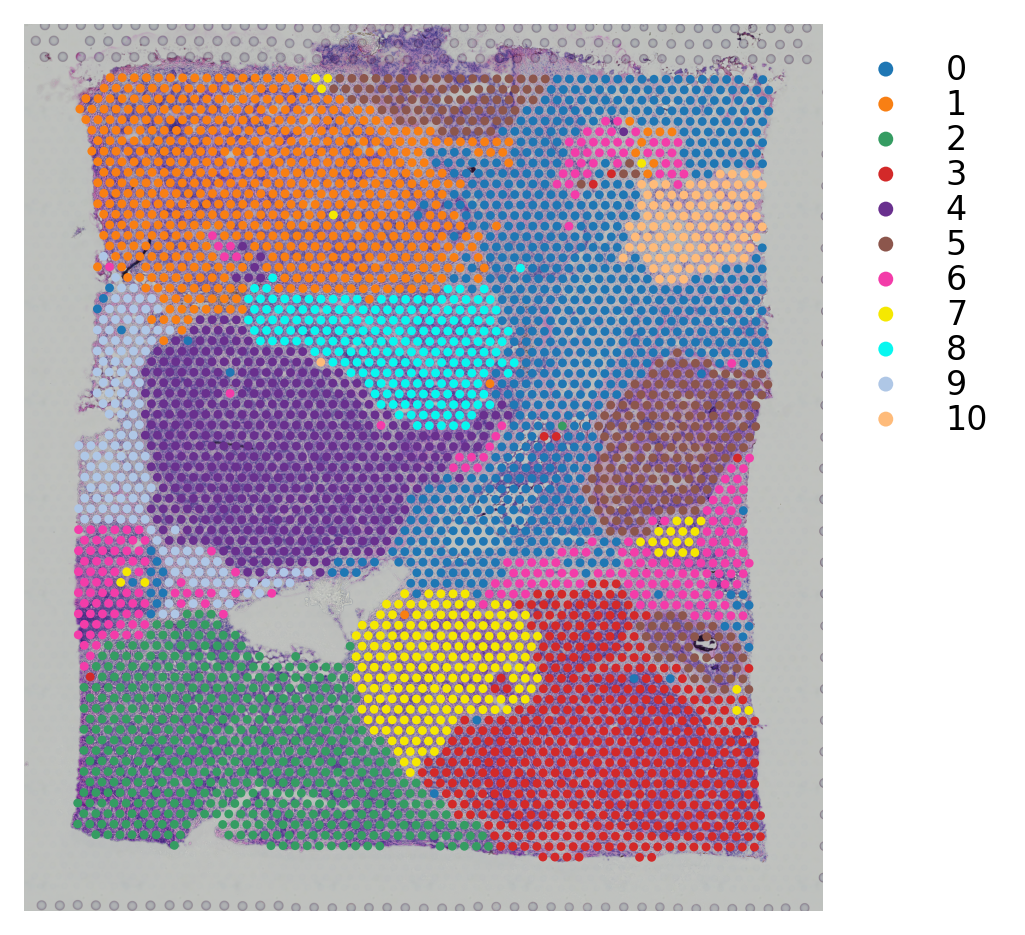

In [4]:
st.pl.cluster_plot(data,use_label="louvain",image_alpha=1,size=7)

In [5]:
data.uns["iroot"] = st.spatial.trajectory.set_root(data,use_label="louvain",cluster="5",use_raw=True)
st.spatial.trajectory.pseudotime(data,eps=34,use_rep="X_pca",use_label="louvain",threshold_spots=2)

All available trajectory paths are stored in adata.uns['available_paths'] with length < 4 nodes


In [6]:
data.uns["iroot"] = st.spatial.trajectory.set_root(data,use_label="sub_cluster_labels",cluster="13",use_raw=True)
st.spatial.trajectory.pseudotime(data,eps=34,use_rep="X_pca",use_label="louvain",threshold_spots=2)

All available trajectory paths are stored in adata.uns['available_paths'] with length < 4 nodes


In [7]:
st.spatial.trajectory.pseudotimespace_global(data,use_label="louvain",list_clusters=["5","7"],model="spatial")

Start to construct the trajectory: 5 -> 7


In [8]:
# data.uns["screening_result_global"].plot(x="w",ylim=[0,2]).get_figure().savefig('optimize_w.pdf')

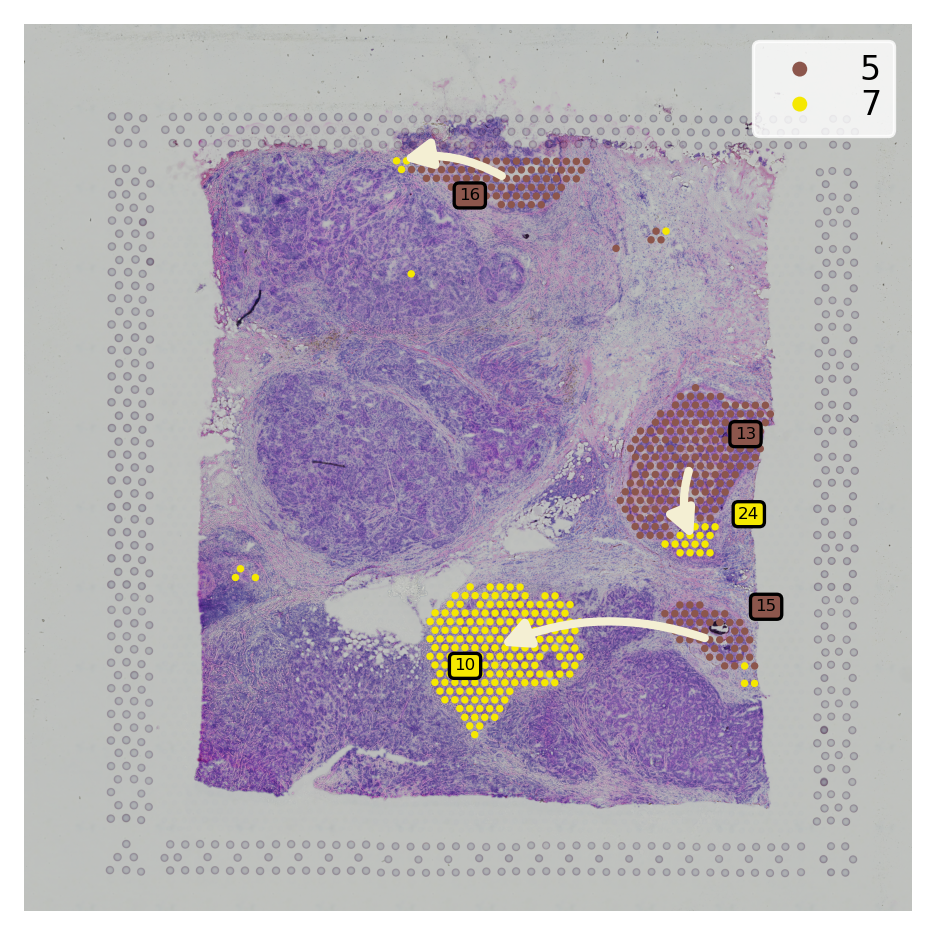

In [9]:
st.pl.cluster_plot(data,use_label="louvain",show_trajectories=True,list_clusters=["5","7"],show_subcluster=True,crop=False,)
                   # fname="block2_psts.pdf")

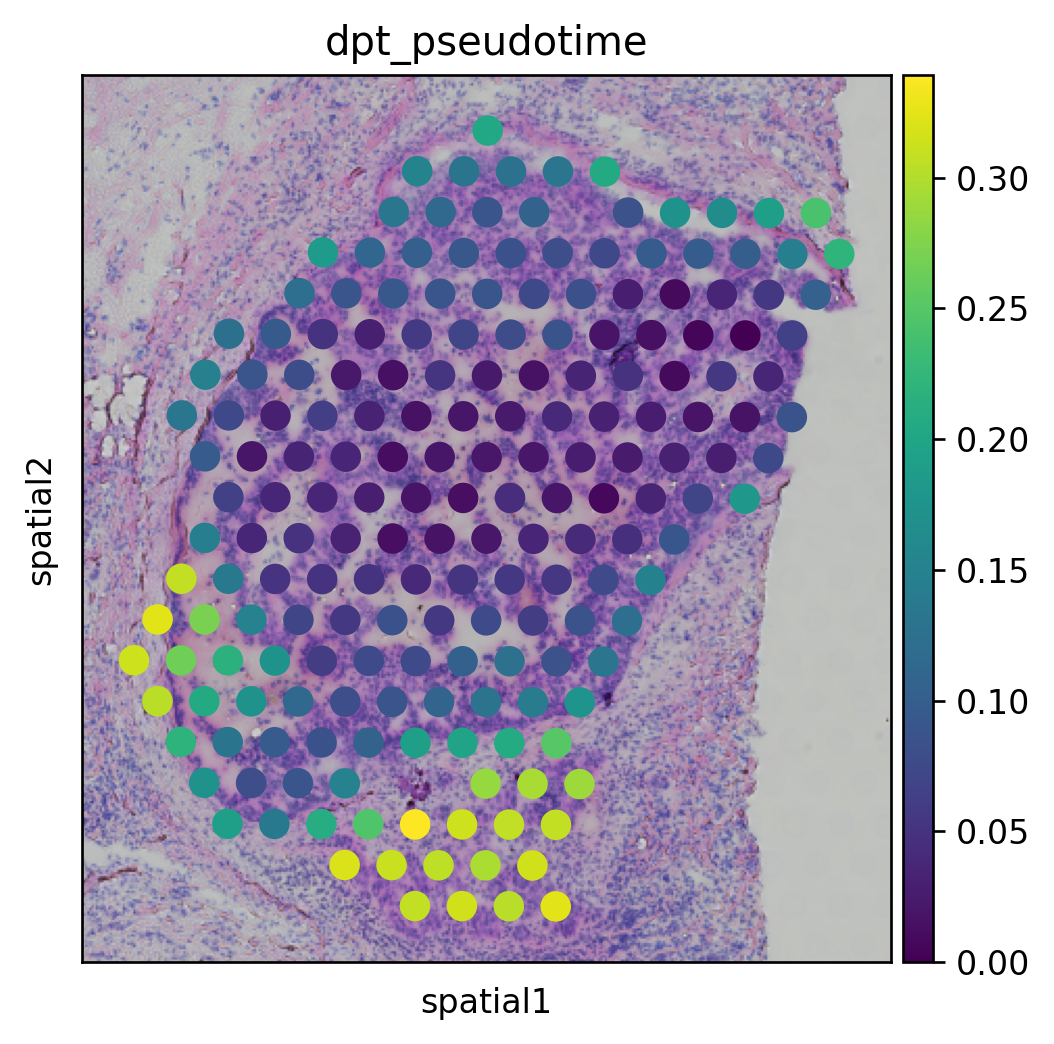

In [ ]:
import scanpy as sc
sc.pl.spatial(data[data.obs["sub_cluster_labels"].isin(["13","24"])],color="dpt_pseudotime",save="block2_cropped_dpt.pdf")

In [32]:
st.spatial.trajectory.detect_transition_markers_clades(data,clade=13,use_raw_count=False,cutoff_spearman=0.4)

Detecting the transition markers of clade_13...
Transition markers result is stored in adata.uns['clade_13']


In [33]:
data.uns['clade_13'] = data.uns['clade_13'][data.uns['clade_13']['gene'].map(lambda x: "RPL"  not in x)]
data.uns['clade_13'] = data.uns['clade_13'][data.uns['clade_13']['gene'].map(lambda x: "RPS" not in x)]
data.uns['clade_13'] = data.uns['clade_13'][data.uns['clade_13']['gene'].map(lambda x: "MT-" not in x)]

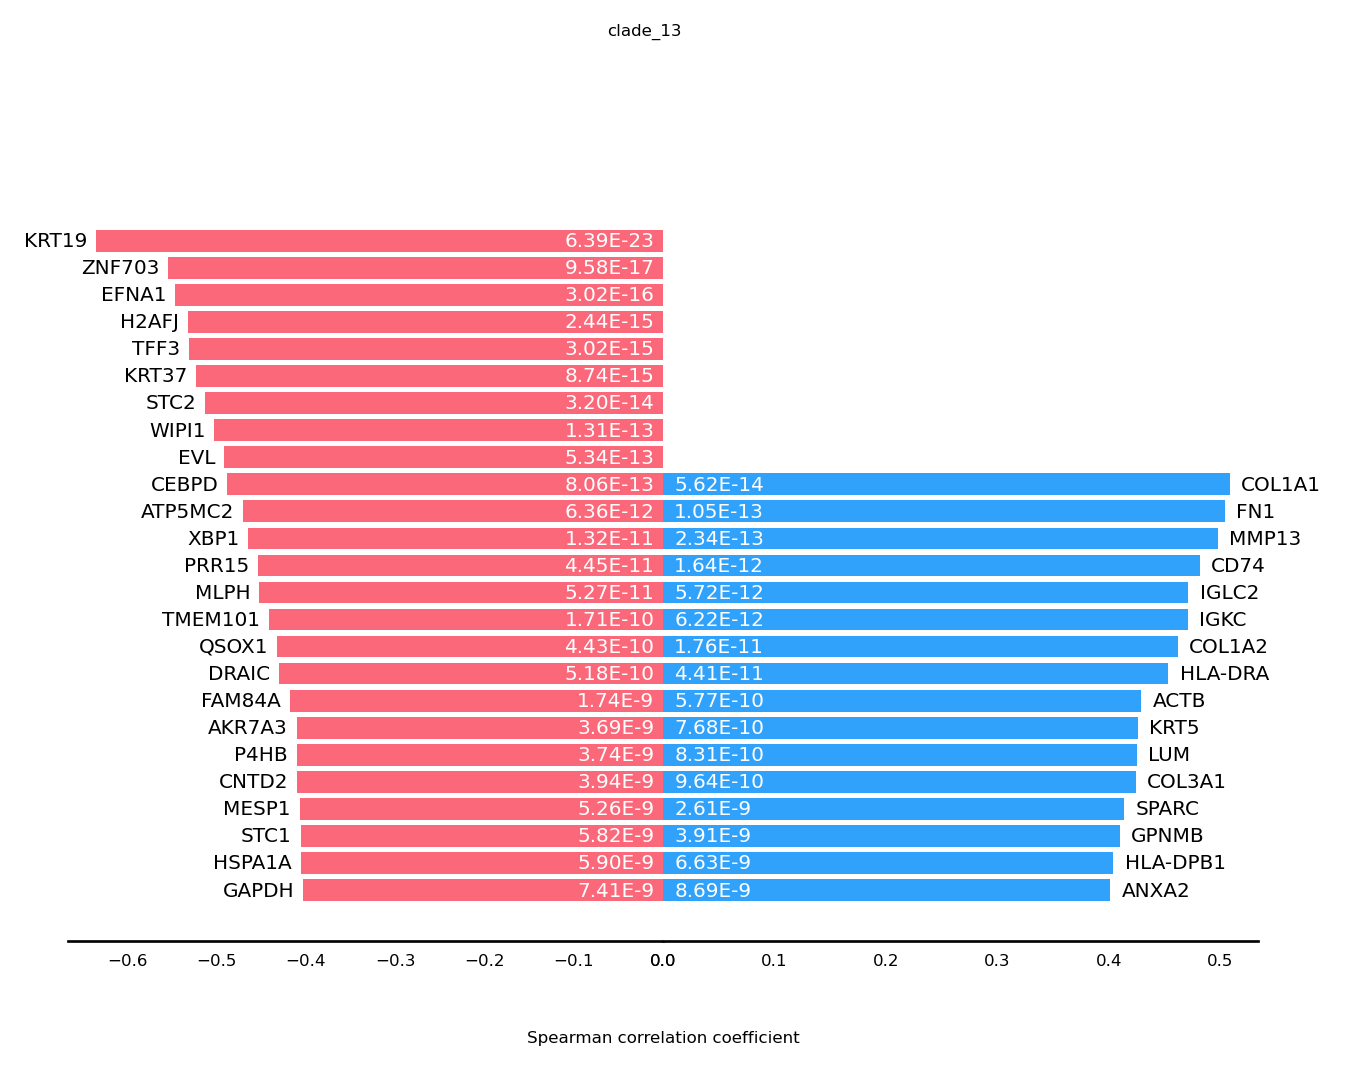

In [34]:
st.pl.trajectory.transition_markers_plot(data,top_genes=30,trajectory="clade_13")

In [30]:
data.uns['clade_13'][data.uns['clade_13']['score'] > 0.3]["gene"].to_csv("tmp_block1_clade13_ver2")

In [31]:
data.uns['clade_13'][data.uns['clade_13']['score'] < -0.3]["gene"].to_csv("tmp_block1_clade13_down_ver2")